<a href="https://colab.research.google.com/github/zeel-912/Customer_Churn_prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense
from sklearn import preprocessing


<ipython-input-2-4fd42613c56d>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
file_path = '/content/drive/MyDrive/Sunbasedata/customer_churn_large_dataset.xlsx'
data = pd.read_excel(file_path)
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
print("Shape :\n",data.shape)
print("\n")
print("Columns :\n",data.columns)
print("\n")
print("Info :\n",data.info())
print("\n")
print("Missing Value data:\n",data.isnull().sum())



Shape :
 (100000, 9)


Columns :
 Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory us

In [5]:
data.describe()


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


<ipython-input-6-d516a7eb5ba1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


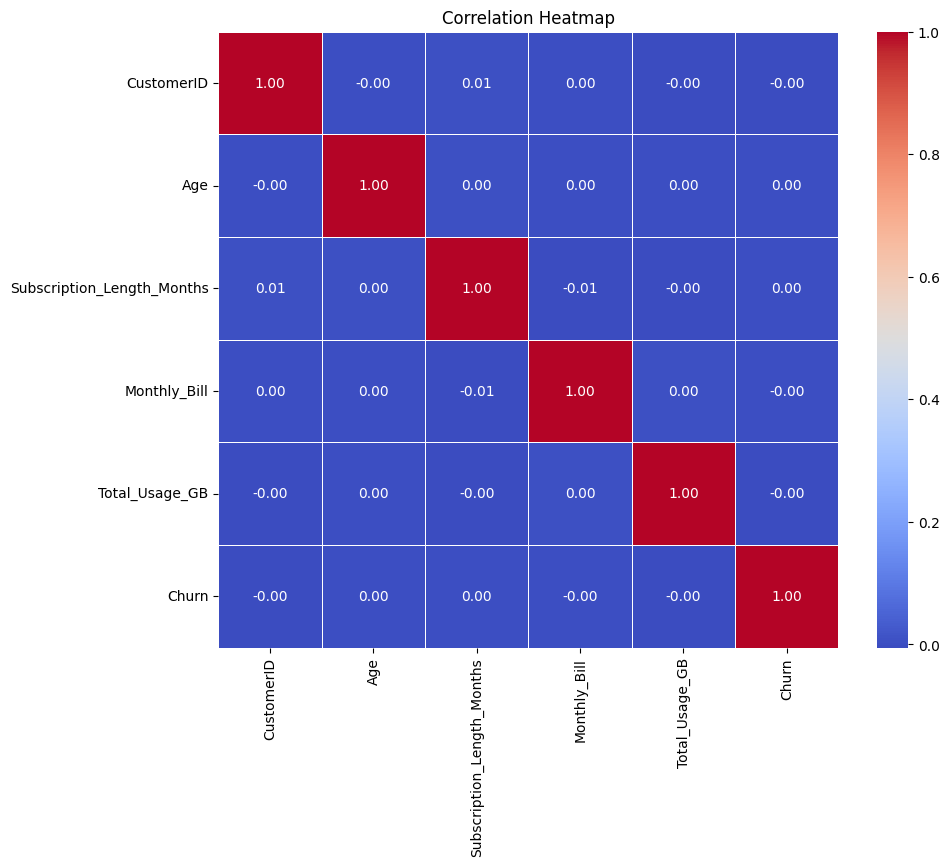

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [7]:
column_name = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]


print("Identified Outliers:")
outliers

Identified Outliers:


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
scaler = MinMaxScaler()
numerical_columns = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [9]:
selected_columns = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


X = data[selected_columns]
y = data['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
1750/1750 [==============================] - 9s 4ms/step - loss: 0.6934 - accuracy: 0.5008 - val_loss: 0.6935 - val_accuracy: 0.4946
Epoch 2/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 3/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6938 - val_accuracy: 0.4946
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6933 - val_accuracy: 0.4976
Epoch 5/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 6/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5039
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.6931 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy

In [14]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

938/938 [==============================] - 2s 2ms/step


In [15]:
classification_report = cr(y_test, y_pred_binary)
print(classification_report)

              precision    recall  f1-score   support

           0       0.50      0.88      0.64     15152
           1       0.49      0.12      0.19     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.42     30000
weighted avg       0.50      0.50      0.42     30000



In [16]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = []

for train_idx, val_idx in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_binary = (y_val_pred > 0.5).astype(int)
    score = accuracy_score(y_val_fold, y_val_pred_binary)
    scores.append(score)

print("Cross-Validation Mean Accuracy:", np.mean(scores))

438/438 [==============================] - 1s 1ms/step
Cross-Validation Mean Accuracy: 0.5007571428571428


In [17]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=3,
    directory='my_dir',  # Directory to store tuning results
    project_name='my_project'
)


tuner.search(X_train, y_train, epochs=10, validation_split=0.2)


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps)

best_model = tuner.hypermodel.build(best_hps)

best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Trial 10 Complete [00h 03m 32s]
val_accuracy: 0.5037618974844614

Best val_accuracy So Far: 0.5060238043467203
Total elapsed time: 00h 34m 35s
Best Hyperparameters:
Epoch 1/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.6938 - accuracy: 0.5005 - val_loss: 0.6940 - val_accuracy: 0.4971
Epoch 2/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.6934 - accuracy: 0.5005 - val_loss: 0.6933 - val_accuracy: 0.5019
Epoch 3/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.6933 - accuracy: 0.5033 - val_loss: 0.6934 - val_accuracy: 0.4964
Epoch 4/50
1750/1750 [==============================] - 4s 3ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6934 - val_accuracy: 0.4959
Epoch 5/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 6/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0

In [18]:
from tensorflow.keras.models import save_model


# Serialize and save the model to an HDF5 file
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:


# Check class counts
class_counts = data['Churn'].value_counts()
print("Class Counts:")
print(class_counts)

# Calculate class proportions
class_proportions = (class_counts / len(data)) * 100
print("\nClass Proportions (%):")
print(class_proportions)

# Calculate imbalance ratio
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
imbalance_ratio = minority_class_count / majority_class_count
print("\nImbalance Ratio:")
print(imbalance_ratio)


Class Counts:
0    50221
1    49779
Name: Churn, dtype: int64

Class Proportions (%):
0    50.221
1    49.779
Name: Churn, dtype: float64

Imbalance Ratio:
0.9911989008582067
